# Auto Insurance Claims Fraud Detection

# Business Requirement

An insurance company has approached you with a dataset of previous claims of their clients. The insurance company wants you to develop a model to help them predict which claims look fraudulent. By doing so you hope to save the company millions of dollars annually.

Claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims. With Random Forest Non-Parametric Machine Learning Algorithm, I am trying to troubleshoot and help the General Insurance industry with this problem.

The data that I have is from Automobile Insurance. I will be creating a predictive model that predicts if an insurance claim is fraudulent or not. The answere between YES/NO, is a Binary Classification task. A comparison study has been performed to understand which ML algorithm suits best to the dataset.

In [1]:
import os
os.getcwd()

'C:\\Users\\Anoop Mishra'

In [2]:
#Importing required libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# pandas version 0.24 or upper is required
pd.__version__

'0.25.3'

In [3]:
#load & view raw data
df = pd.read_csv('F:/insurance_claim_updated.csv')
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital.gains,capital.loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,5,37,939011,2002-07-16,IN,250/500,500,1145.28,0.0,360963,FEMALE,Associate,priv-house-serv,movies,husband,54735,88553,2015-02-06,Single Vehicle Collision,Front Collision,Minor Damage,Other,NY,Hillsdale,6770 1st St,20,1,?,2,1,YES,96200.0,3000,500,58870,Saab,92x,1997,N
1,462,58,902576,2002-11-28,IL,500/1000,1000,1156.80,0.0,432568,FEMALE,MD,exec-managerial,camping,other-relative,1381,50621,2015-01-18,Multi-vehicle Collision,Rear Collision,Total Loss,Other,SC,Arlington,3275 Pine St,11,2,?,0,5,?,31200.0,3830,7370,32130,Saab,95,2006,N
2,198,51,575784,2007-05-12,OH,100/300,2000,751.02,0.0,712296,FEMALE,High School,farming-fishing,golf,own-child,0,0,2015-02-13,Parked Car,?,Trivial Damage,None,SC,Arlington,1741 Best Ridge,0,1,NO,1,3,?,14500.0,0,0,5690,Chevrolet,Malibu,1996,N
3,384,47,102488,1998-02-10,OH,100/300,500,1137.34,1000000.0,402197,FEMALE,High School,transport-moving,bungie-jumping,husband,0,42211,2015-01-27,Vehicle Theft,?,Trivial Damage,Police,WV,Springfield,9744 Texas Drive,6,1,YES,1,1,NO,7500.0,0,0,420,Saab,95,1990,N
4,100,27,1129102,2012-03-01,IL,100/300,2000,1082.70,4000000.0,577005,FEMALE,PhD,armed-forces,exercise,husband,0,0,2015-02-21,Vehicle Theft,?,Minor Damage,None,OH,Northbrook,3289 Britain Drive,5,1,NO,2,1,YES,16500.0,5400,4300,8270,Toyota,Highlander,1998,N
5,306,50,769636,1999-01-09,IN,100/300,500,1386.90,3000000.0,478119,FEMALE,High School,armed-forces,dancing,wife,0,5905,2015-02-17,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NY,Columbus,4633 5th Lane,6,2,YES,1,1,NO,37710.0,14780,5400,48800,Honda,Civic,1995,N
6,105,27,948899,2003-04-04,IL,250/500,2000,1161.78,5000000.0,377775,MALE,MD,farming-fishing,basketball,not-in-family,0,1185,2015-02-12,Multi-vehicle Collision,Rear Collision,Total Loss,Other,VA,Northbrook,3653 Elm Drive,11,3,?,0,1,YES,36400.0,6100,190,27630,Chevrolet,Tahoe,2005,N
7,249,49,330251,2012-07-24,IN,100/300,2000,1411.67,0.0,505288,MALE,JD,transport-moving,hiking,own-child,16759,77869,2015-02-17,Single Vehicle Collision,Front Collision,Total Loss,Fire,NY,Riverwood,1580 Maple Lane,3,1,NO,0,3,?,83000.0,16000,770,58000,Accura,RSX,2009,N
8,44,28,136414,1995-05-08,IL,100/300,500,1529.81,0.0,436652,MALE,Associate,tech-support,kayaking,not-in-family,0,0,2015-01-03,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,WV,Columbus,4862 Lincoln Hwy,22,1,NO,3,2,?,34510.0,11000,5880,24800,BMW,M5,2005,N
9,104,35,701032,2014-07-05,IL,250/500,500,1233.94,0.0,538379,MALE,Associate,protective-serv,movies,husband,0,19249,2015-02-21,Multi-vehicle Collision,Side Collision,Major Damage,Other,NC,Arlington,7609 Rock St,16,4,YES,1,2,?,91100.0,11410,14160,59520,Audi,A5,2000,N


In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                 float64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital.gains                    int64
capital.loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital.gains', 'capital.loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
df.shape

(10211, 39)

In [7]:
df.nunique()

months_as_customer               614
age                               76
policy_number                  10163
policy_bind_date                 951
policy_state                       3
policy_csl                         3
policy_deductable                  3
policy_annual_premium           9706
umbrella_limit                    11
insured_zip                    10045
insured_sex                        2
insured_education_level            7
insured_occupation                14
insured_hobbies                   20
insured_relationship               6
capital.gains                   4940
capital.loss                    4871
incident_date                     60
incident_type                      4
collision_type                     4
incident_severity                  4
authorities_contacted              5
incident_state                     7
incident_city                      7
incident_location               1000
incident_hour_of_the_day          25
number_of_vehicles_involved        6
p

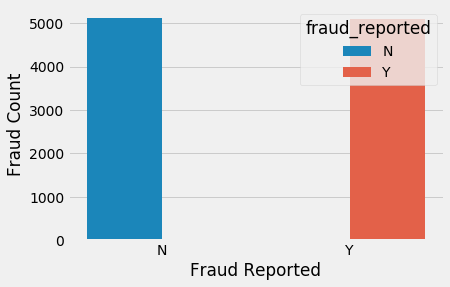

In [8]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')
ax.set_xlabel('Fraud Reported')
ax.set_ylabel('Fraud Count')
plt.show()

In [9]:
df['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    5118
Y    5093
Name: fraud_reported, dtype: int64

In [10]:
df['incident_state'].value_counts()

SC    2656
NY    2476
WV    2061
NC    1256
VA    1129
OH     321
PA     312
Name: incident_state, dtype: int64

Text(0.5, 25.200000000000003, 'Age')

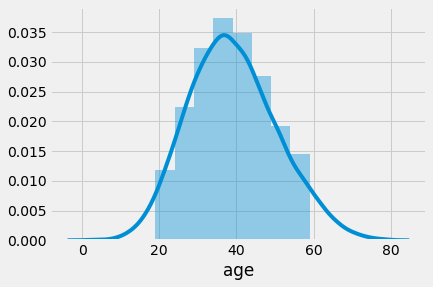

In [11]:
sns.distplot(df.age, bins=np.arange(19,64,5))
ax.set_ylabel('Density')
ax.set_xlabel('Age')

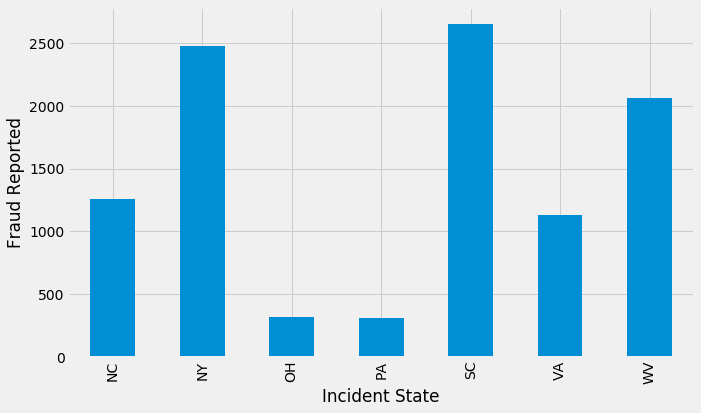

In [12]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident State')
plt.show()

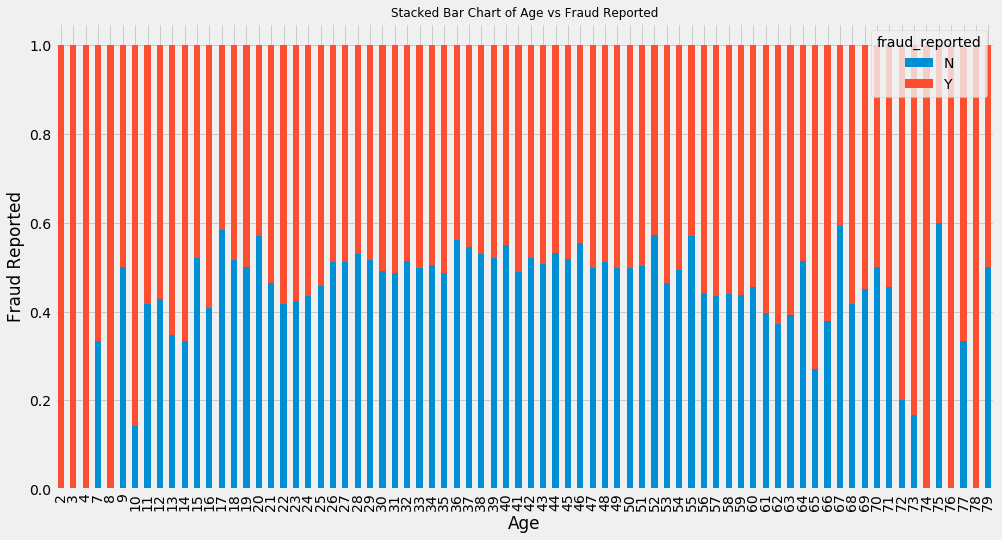

In [13]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud Reported')
plt.show()

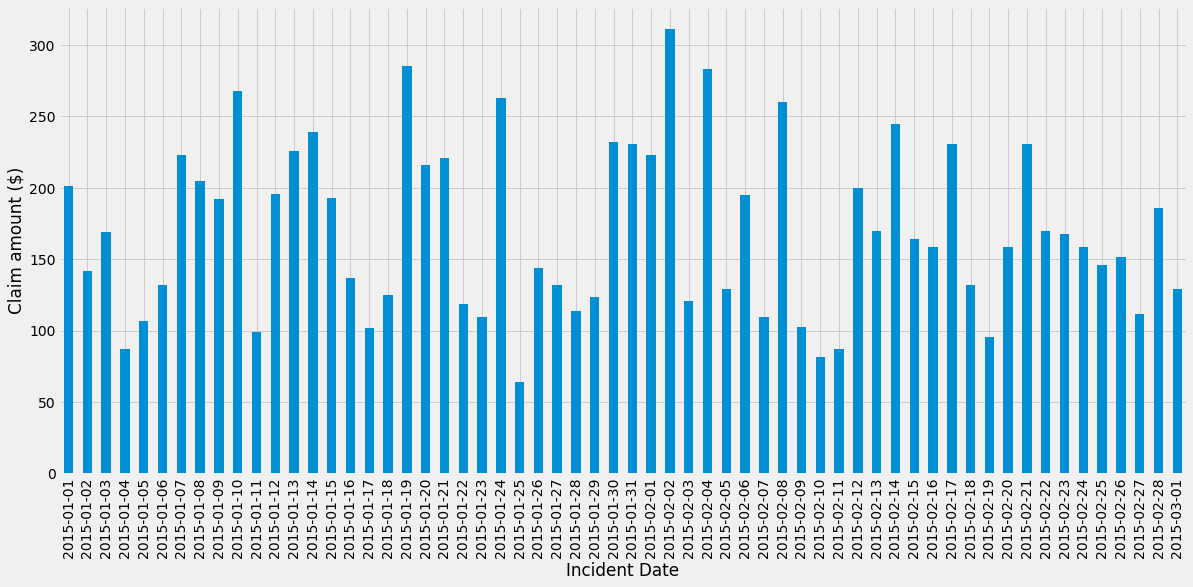

In [14]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,8))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
ax.set_xlabel('Incident Date')
plt.show()

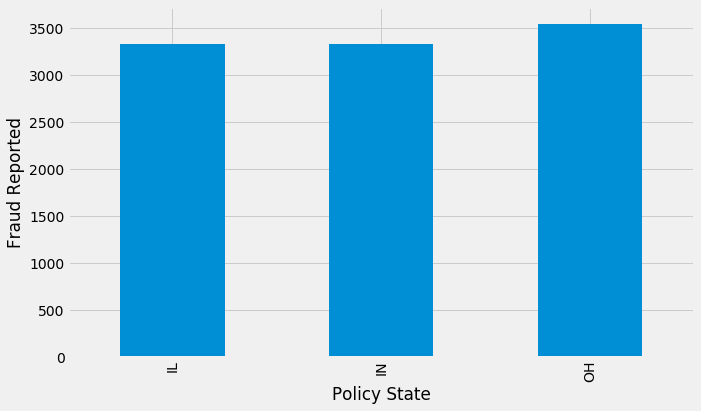

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Policy State')
plt.show()

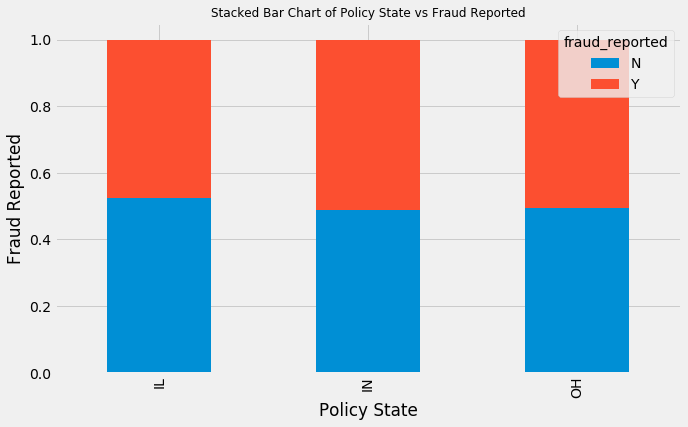

In [16]:
plt.rcParams['figure.figsize'] = [10, 6]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.policy_state, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy State')
plt.ylabel('Fraud Reported')
plt.show()

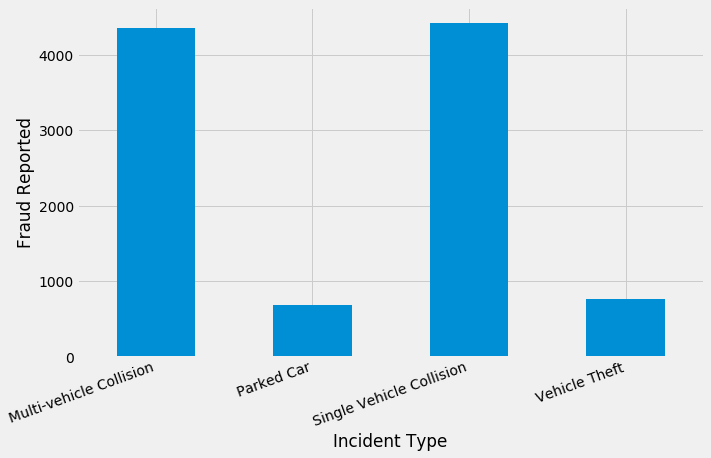

In [17]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident Type')
plt.show()

Text(0.5, 0, 'Incident State')

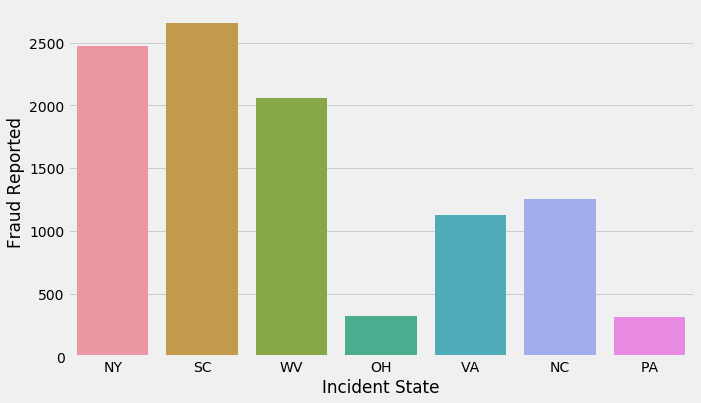

In [18]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident State')

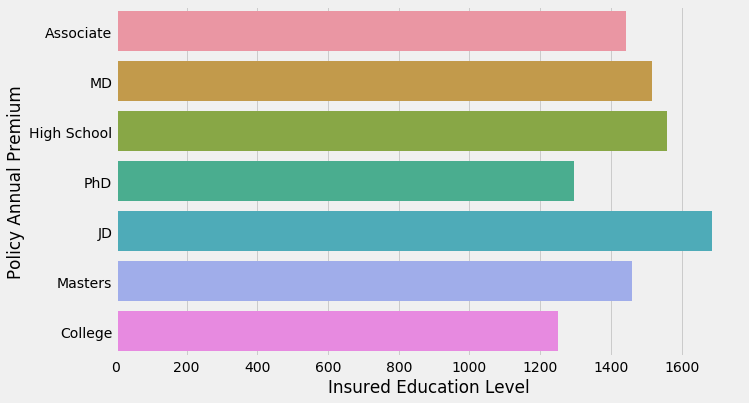

In [19]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('Policy Annual Premium')
ax.set_xlabel('Insured Education Level')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

Text(0, 0.5, 'Fraud Reported')

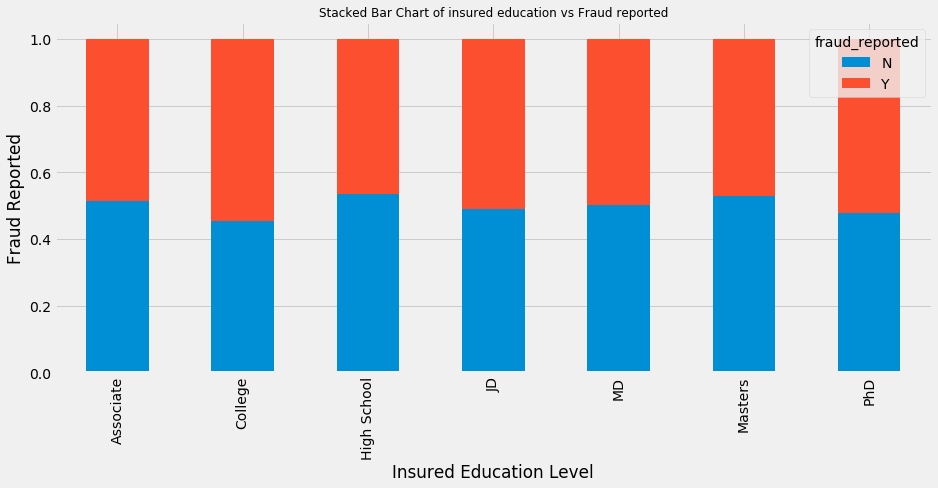

In [20]:
plt.rcParams['figure.figsize'] = [14, 6]
table=pd.crosstab(df.insured_education_level, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured education vs Fraud reported', fontsize=12)
plt.xlabel('Insured Education Level')
plt.ylabel('Fraud Reported')

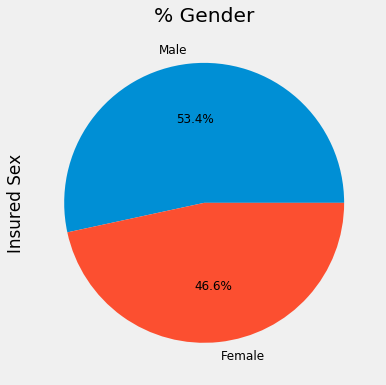

In [21]:
plt.rcParams['figure.figsize'] = [6, 6]
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.ylabel('Insured Sex')
plt.show()

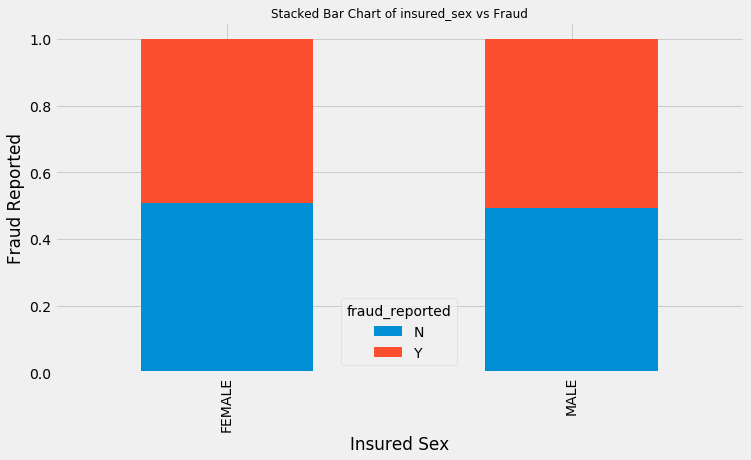

In [22]:
plt.rcParams['figure.figsize'] = [11, 6]
table=pd.crosstab(df.insured_sex, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_sex vs Fraud', fontsize=12)
plt.xlabel('Insured Sex')
plt.ylabel('Fraud Reported')
plt.show()

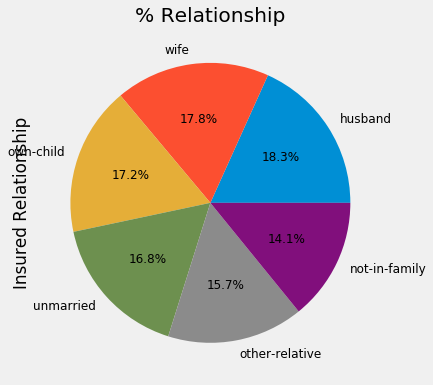

In [23]:
plt.rcParams['figure.figsize'] = [6, 6]
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.ylabel('Insured Relationship')
plt.show()

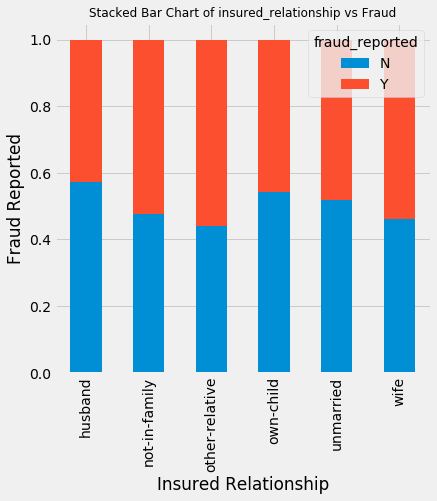

In [24]:
table=pd.crosstab(df.insured_relationship, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('Insured Relationship')
plt.ylabel('Fraud Reported')
plt.show()

Text(0, 0.5, 'Incident Type')

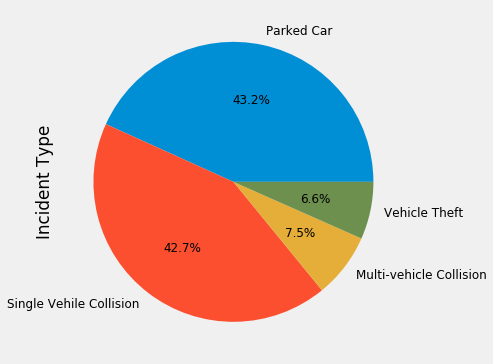

In [25]:
fig = plt.figure(figsize=(6,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12)
plt.ylabel('Incident Type')

Text(0, 0.5, 'Authorities Contacted')

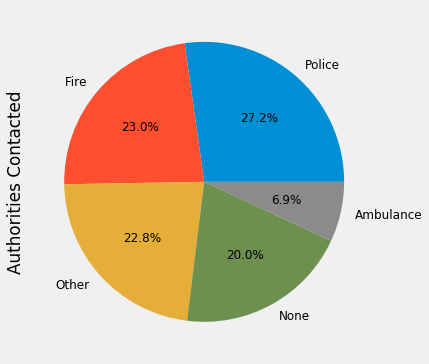

In [26]:
fig = plt.figure(figsize=(6,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)
plt.ylabel('Authorities Contacted')

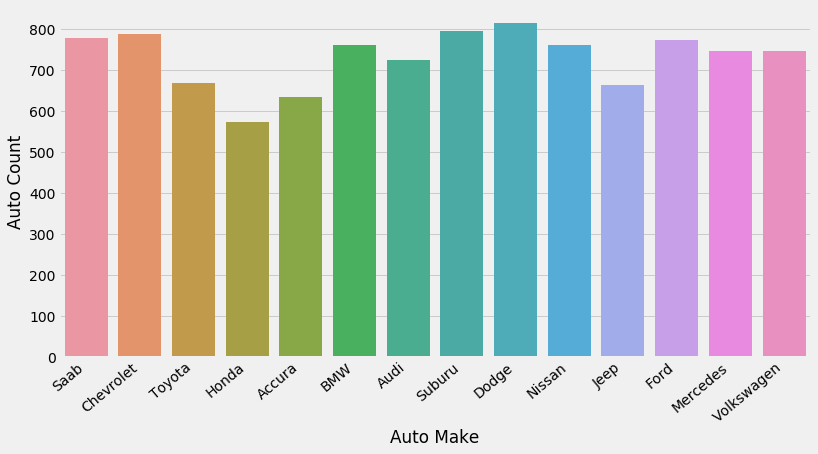

In [27]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Auto Make')
plt.ylabel('Auto Count')
plt.show()

Text(0, 0.5, 'Incident Severity')

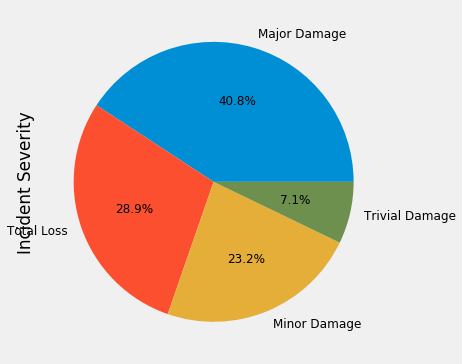

In [28]:
fig = plt.figure(figsize=(6,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)
plt.ylabel('Incident Severity')

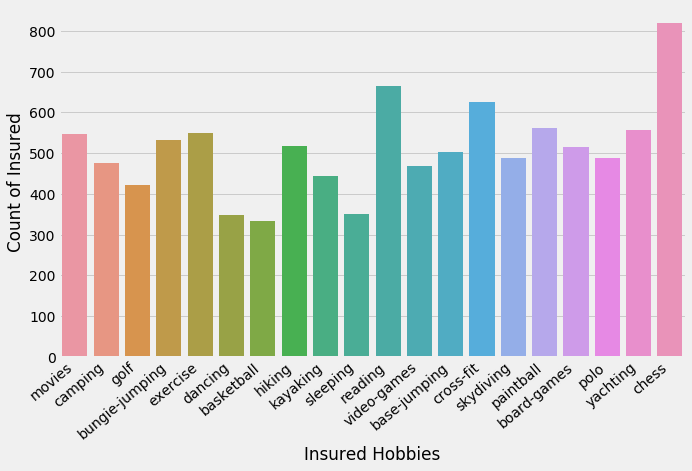

In [29]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Insured Hobbies')
plt.ylabel('Count of Insured')
plt.show()

In [30]:
df["insured_occupation"].value_counts()

machine-op-inspct    894
exec-managerial      888
tech-support         851
prof-specialty       845
craft-repair         783
sales                780
armed-forces         731
transport-moving     730
priv-house-serv      654
protective-serv      646
other-service        641
adm-clerical         618
farming-fishing      597
handlers-cleaners    553
Name: insured_occupation, dtype: int64

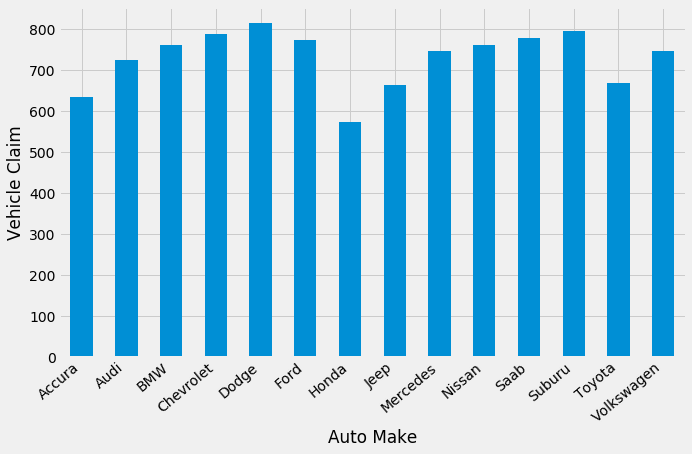

In [31]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle Claim')
ax.set_xlabel('Auto Make')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

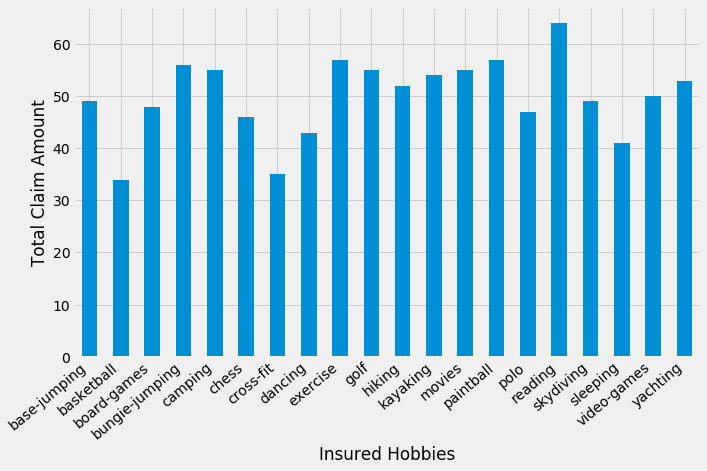

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total Claim Amount')
ax.set_xlabel('Insured Hobbies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [32]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital.gains,capital.loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,5,37,939011,2002-07-16,IN,250/500,500,1145.28,0.0,360963,FEMALE,Associate,priv-house-serv,movies,husband,54735,88553,2015-02-06,Single Vehicle Collision,Front Collision,Minor Damage,Other,NY,Hillsdale,6770 1st St,20,1,?,2,1,YES,96200.0,3000,500,58870,Saab,92x,1997,0
1,462,58,902576,2002-11-28,IL,500/1000,1000,1156.80,0.0,432568,FEMALE,MD,exec-managerial,camping,other-relative,1381,50621,2015-01-18,Multi-vehicle Collision,Rear Collision,Total Loss,Other,SC,Arlington,3275 Pine St,11,2,?,0,5,?,31200.0,3830,7370,32130,Saab,95,2006,0
2,198,51,575784,2007-05-12,OH,100/300,2000,751.02,0.0,712296,FEMALE,High School,farming-fishing,golf,own-child,0,0,2015-02-13,Parked Car,?,Trivial Damage,None,SC,Arlington,1741 Best Ridge,0,1,NO,1,3,?,14500.0,0,0,5690,Chevrolet,Malibu,1996,0
3,384,47,102488,1998-02-10,OH,100/300,500,1137.34,1000000.0,402197,FEMALE,High School,transport-moving,bungie-jumping,husband,0,42211,2015-01-27,Vehicle Theft,?,Trivial Damage,Police,WV,Springfield,9744 Texas Drive,6,1,YES,1,1,NO,7500.0,0,0,420,Saab,95,1990,0
4,100,27,1129102,2012-03-01,IL,100/300,2000,1082.70,4000000.0,577005,FEMALE,PhD,armed-forces,exercise,husband,0,0,2015-02-21,Vehicle Theft,?,Minor Damage,None,OH,Northbrook,3289 Britain Drive,5,1,NO,2,1,YES,16500.0,5400,4300,8270,Toyota,Highlander,1998,0


In [33]:
df[['insured_zip']] = df[['insured_zip']].astype(object)
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital.gains,capital.loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,10211.000000,10211.000000,1.021100e+04,10211.000000,10211.000000,1.021100e+04,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000
mean,213.467927,39.050142,5.474680e+05,1159.044168,1257.794204,1.727157e+06,16459.434531,17150.482029,11.229850,2.010087,1.139262,1.652434,56608.934482,7912.681422,8028.269513,40822.630497,2004.358927,0.498776
std,133.639732,11.508964,3.034069e+05,621.773731,300.874661,2.407828e+06,24596.437735,25528.629014,6.411803,1.101773,0.896285,1.195957,27647.190092,5456.281497,5514.767560,19666.958809,6.442418,0.500023
min,0.000000,2.000000,4.410000e+02,500.000000,179.790000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,10.000000,1981.000000,0.000000
25%,106.000000,31.000000,3.095050e+05,500.000000,1058.790000,0.000000e+00,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,37930.000000,3615.000000,3730.000000,27700.000000,2000.000000,0.000000
50%,202.000000,38.000000,5.364750e+05,1000.000000,1255.210000,1.000000e+06,155.000000,0.000000,12.000000,2.000000,1.000000,2.000000,58200.000000,7460.000000,7600.000000,42200.000000,2005.000000,0.000000
75%,303.000000,47.000000,7.717955e+05,2000.000000,1454.130000,3.000000e+06,26191.000000,27564.000000,16.000000,3.000000,2.000000,3.000000,76000.000000,11800.000000,11770.000000,54700.000000,2009.000000,1.000000
max,747.000000,79.000000,1.615353e+06,2000.000000,2390.510000,1.000000e+07,134607.000000,142321.000000,24.000000,6.000000,4.000000,6.000000,154740.000000,30000.000000,29700.000000,110800.000000,2015.000000,1.000000


In [34]:
df.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital.gains,capital.loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,10211.000000,10211.000000,1.021100e+04,10211,10211,10211,10211.000000,10211.000000,1.021100e+04,10211.0,10211,10211,10211,10211,10211,10211.000000,10211.000000,10211,10211,10211,10211,10211,10211,10211,10211,10211.000000,10211.000000,10211,10211.000000,10211.000000,10211,10211.000000,10211.000000,10211.000000,10211.000000,10211,10211,10211.000000,10211.000000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,10045.0,2,7,14,20,6,NaN,NaN,60,4,4,4,5,7,7,1000,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,NaN
top,NaN,NaN,NaN,1997-11-07,OH,250/500,NaN,NaN,NaN,429118.0,FEMALE,JD,machine-op-inspct,chess,other-relative,NaN,NaN,2015-02-02,Single Vehicle Collision,Rear Collision,Major Damage,Police,SC,Springfield,8954 Apache Lane,NaN,NaN,?,NaN,NaN,?,NaN,NaN,NaN,NaN,Dodge,RAM,NaN,NaN
freq,NaN,NaN,NaN,61,3549,3671,NaN,NaN,NaN,2.0,5451,1687,894,819,1864,NaN,NaN,311,4415,3283,4164,2781,2656,1599,34,NaN,NaN,3869,NaN,NaN,3577,NaN,NaN,NaN,NaN,813,485,NaN,NaN
mean,213.467927,39.050142,5.474680e+05,NaN,NaN,NaN,1159.044168,1257.794204,1.727157e+06,NaN,NaN,NaN,NaN,NaN,NaN,16459.434531,17150.482029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.229850,2.010087,NaN,1.139262,1.652434,NaN,56608.934482,7912.681422,8028.269513,40822.630497,NaN,NaN,2004.358927,0.498776
std,133.639732,11.508964,3.034069e+05,NaN,NaN,NaN,621.773731,300.874661,2.407828e+06,NaN,NaN,NaN,NaN,NaN,NaN,24596.437735,25528.629014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.411803,1.101773,NaN,0.896285,1.195957,NaN,27647.190092,5456.281497,5514.767560,19666.958809,NaN,NaN,6.442418,0.500023
min,0.000000,2.000000,4.410000e+02,NaN,NaN,NaN,500.000000,179.790000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN,100.000000,0.000000,0.000000,10.000000,NaN,NaN,1981.000000,0.000000
25%,106.000000,31.000000,3.095050e+05,NaN,NaN,NaN,500.000000,1058.790000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,0.000000,1.000000,NaN,37930.000000,3615.000000,3730.000000,27700.000000,NaN,NaN,2000.000000,0.000000
50%,202.000000,38.000000,5.364750e+05,NaN,NaN,NaN,1000.000000,1255.210000,1.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,155.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,2.000000,NaN,1.000000,2.000000,NaN,58200.000000,7460.000000,7600.000000,42200.000000,NaN,NaN,2005.000000,0.000000
75%,303.000000,47.000000,7.717955e+05,NaN,NaN,NaN,2000.000000,1454.130000,3.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,26191.000000,27564.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,3.000000,NaN,2.000000,3.000000,NaN,76000.000000,11800.000000,11770.000000,54700.000000,NaN,NaN,2009.000000,1.000000


<Figure size 1008x432 with 0 Axes>

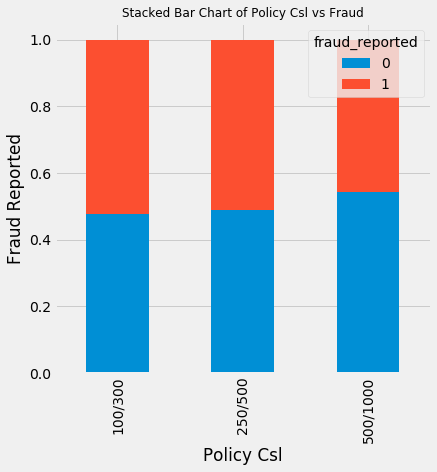

In [35]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,6))
table=pd.crosstab(df.policy_csl, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy Csl vs Fraud', fontsize=12)
plt.xlabel('Policy Csl')
plt.ylabel('Fraud Reported')
plt.show()

In [36]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]
df['csl_per_person'].head()

0    250
1    500
2    100
3    100
4    100
Name: csl_per_person, dtype: object

In [37]:
df['csl_per_accident'].head()

0     500
1    1000
2     300
3     300
4     300
Name: csl_per_accident, dtype: object

In [38]:
df.auto_year.value_counts()  # check the spread of years to decide on further action.

2008    905
2010    667
2009    587
2005    515
2007    484
2004    472
2003    465
2006    460
2002    455
2011    437
1999    435
2001    426
2012    423
2000    418
2013    379
2014    361
1998    352
1997    347
1996    279
1995    276
2015    239
1994    204
1993    181
1992    156
1991    105
1990     72
1989     40
1988     26
1987     17
1986     15
1984      6
1985      3
1983      2
1981      1
1982      1
Name: auto_year, dtype: int64

In [39]:
df['vehicle_age'] = 2018 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    21
1    12
2    22
3    28
4    20
5    23
6    13
7     9
8    13
9    18
Name: vehicle_age, dtype: int64

In [40]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,20,evening
1,11,fore-noon
2,0,past_midnight
3,6,early_morning
4,5,early_morning
5,6,early_morning
6,11,fore-noon
7,3,past_midnight
8,22,night
9,16,afternoon


In [41]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'csl_per_person', 'csl_per_accident',
       'incident_period_of_day'],
      dtype='object')

In [43]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number', 
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location',
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(2)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital.gains,capital.loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_period_of_day
0,5,37,IN,500,1145.28,0.0,FEMALE,Associate,priv-house-serv,movies,husband,54735,88553,Single Vehicle Collision,Front Collision,Minor Damage,Other,NY,Hillsdale,1,?,2,1,YES,96200.0,3000,500,58870,Saab,92x,0,250,500,21,evening
1,462,58,IL,1000,1156.80,0.0,FEMALE,MD,exec-managerial,camping,other-relative,1381,50621,Multi-vehicle Collision,Rear Collision,Total Loss,Other,SC,Arlington,2,?,0,5,?,31200.0,3830,7370,32130,Saab,95,0,500,1000,12,fore-noon


In [44]:
# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                            0
policy_state                0
insured_sex                 0
insured_education_level     0
insured_occupation          0
insured_hobbies             0
insured_relationship        0
incident_type               0
collision_type           1440
incident_severity           0
authorities_contacted       0
incident_state              0
incident_city               0
property_damage          3869
police_report_available  3577
auto_make                   0
auto_model                  0
csl_per_person              0
csl_per_accident            0
incident_period_of_day      0


In [45]:
df.collision_type.value_counts()

Rear Collision     3283
Side Collision     2849
Front Collision    2639
?                  1440
Name: collision_type, dtype: int64

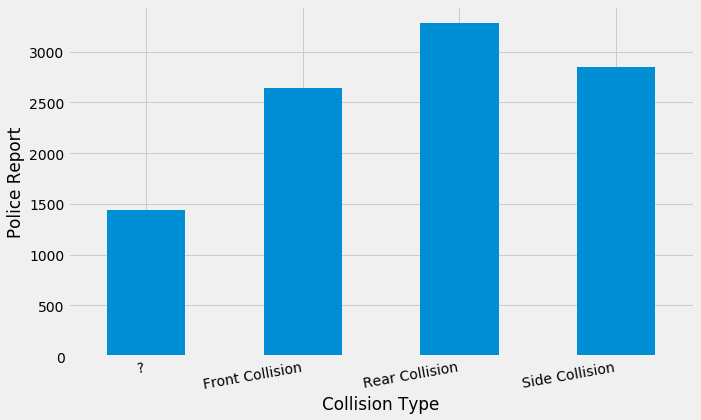

In [46]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police Report')
ax.set_xlabel('Collision Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [47]:
df.property_damage.value_counts()

?      3869
NO     3188
YES    3154
Name: property_damage, dtype: int64

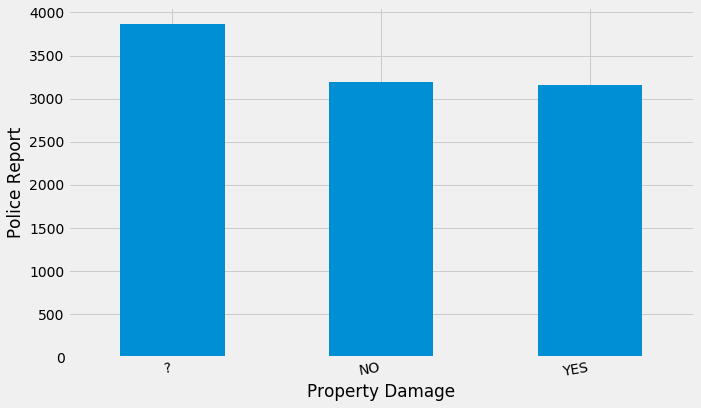

In [48]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police Report')
ax.set_xlabel('Property Damage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [49]:
df.police_report_available.value_counts()

?      3577
NO     3533
YES    3101
Name: police_report_available, dtype: int64

In [50]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital.gains', 'capital.loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'csl_per_person', 'csl_per_accident',
       'vehicle_age', 'incident_period_of_day'],
      dtype='object')

In [51]:
df._get_numeric_data().head()  # Checking numeric columns

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital.gains,capital.loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,5,37,500,1145.28,0.0,54735,88553,1,2,1,96200.0,3000,500,58870,0,21
1,462,58,1000,1156.80,0.0,1381,50621,2,0,5,31200.0,3830,7370,32130,0,12
2,198,51,2000,751.02,0.0,0,0,1,1,3,14500.0,0,0,5690,0,22
3,384,47,500,1137.34,1000000.0,0,42211,1,1,1,7500.0,0,0,420,0,28
4,100,27,2000,1082.70,4000000.0,0,0,1,2,1,16500.0,5400,4300,8270,0,20


In [52]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital.gains',
       'capital.loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [53]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'csl_per_person', 'csl_per_accident', 'incident_period_of_day'],
      dtype='object')

In [54]:
dummies = pd.get_dummies(df[[
    'policy_state', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model', 
    'csl_per_person', 
    'csl_per_accident',
    'incident_period_of_day']])

dummies = dummies.join(df[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,fraud_reported
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,Front Collision,?,YES,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0

In [55]:
X = dummies.iloc[:, 0:-1]  # predictor variables
y = dummies.iloc[:, -1]  # target variable

len(X.columns)

148

In [56]:
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,Front Collision,?,YES
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [57]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud_reported, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']]

,collision_type,collision_en
0,Front Collision,1
1,Rear Collision,2
2,?,0
3,?,0
4,?,0
...,...,...
10206,Rear Collision,2
10207,Rear Collision,2
10208,?,0
10209,Front Collision,1


In [59]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

X.head(10)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,collision_en
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,Front Collision,0,1,1
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0

In [60]:
X = X.drop(columns = ['collision_type'])
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [61]:
X = pd.concat([X, df._get_numeric_data()], axis=1)  # joining numeric columns
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital.gains,capital.loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0

In [62]:
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD',
       ...
       'capital.loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object', length=164)

In [63]:
X = X.drop(columns = ['fraud_reported'])  # dropping target variable 'fraud_reported'
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD',
       ...
       'capital.gains', 'capital.loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=163)

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8486929162094305


In [65]:
print("Accuracy: %0.2f (+/- %0.2f)" % (result.mean(), result.std() * 2))

Accuracy: 0.85 (+/- 0.03)


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  8168 2043
length of y_train and y_test:  8168 2043


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(n_estimators=200)
    
kfold = KFold(n_splits=5, random_state=7)
result2 = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')
print(result2.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9969393498985504


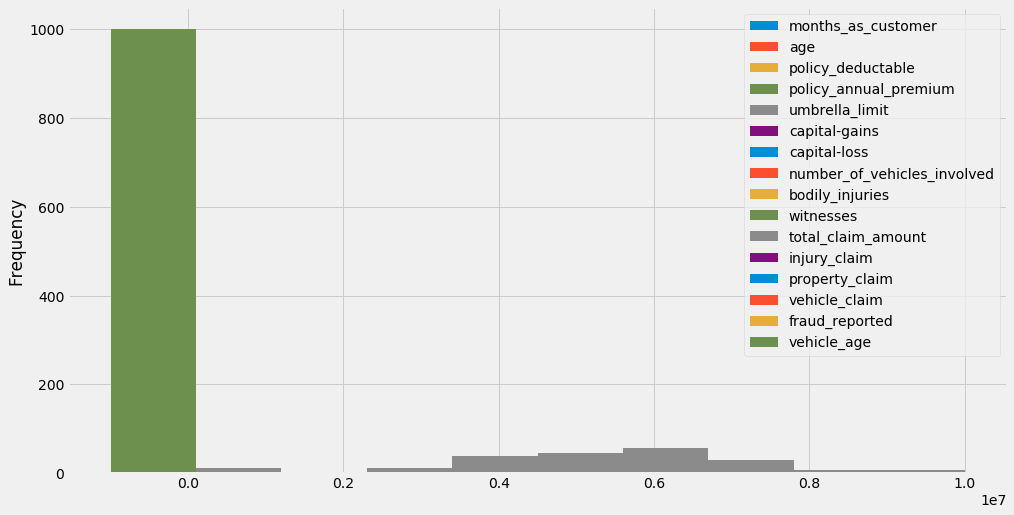

In [65]:
# Generate a Histogram plot for anomaly detection
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [15, 8]
df.plot(kind='hist')
plt.show()

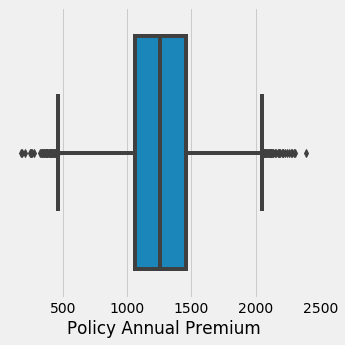

In [68]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.boxplot(x=X.policy_annual_premium)
plt.xlabel('Policy Annual Premium')
plt.show()

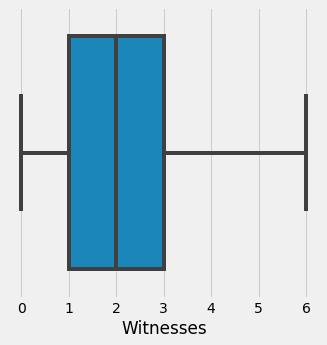

In [69]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.boxplot(x=X.witnesses)
plt.xlabel('Witnesses')
plt.show()

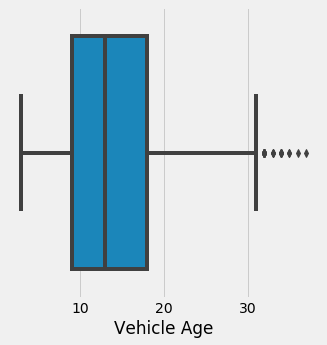

In [70]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.boxplot(x=X.vehicle_age)
plt.xlabel('Vehicle Age')
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[0.        , 0.        , 2.09909411, ..., 2.52213226, 3.58073673,
        2.32400293],
       [0.        , 2.13021908, 0.        , ..., 1.10683502, 2.79361616,
        1.39440176],
       [2.13684297, 0.        , 0.        , ..., 2.26810455, 3.01916235,
        2.63386999],
       ...,
       [0.        , 0.        , 2.09909411, ..., 2.09391412, 3.31955118,
        1.85920235],
       [0.        , 0.        , 2.09909411, ..., 2.1410907 , 2.267172  ,
        1.85920235],
       [2.13684297, 0.        , 0.        , ..., 0.        , 0.98975575,
        2.47893646]])

In [72]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) # retaining columns names
X_train_scaled.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital.gains,capital.loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,0.0,0.000000,2.099094,0.0,2.005862,0.000000,0.0,0.0,0.0,0.0,2.884615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.179298,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.710636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.872019,0.0,2.022539,0.0,0.000000,0.0,0.000000,0.0,

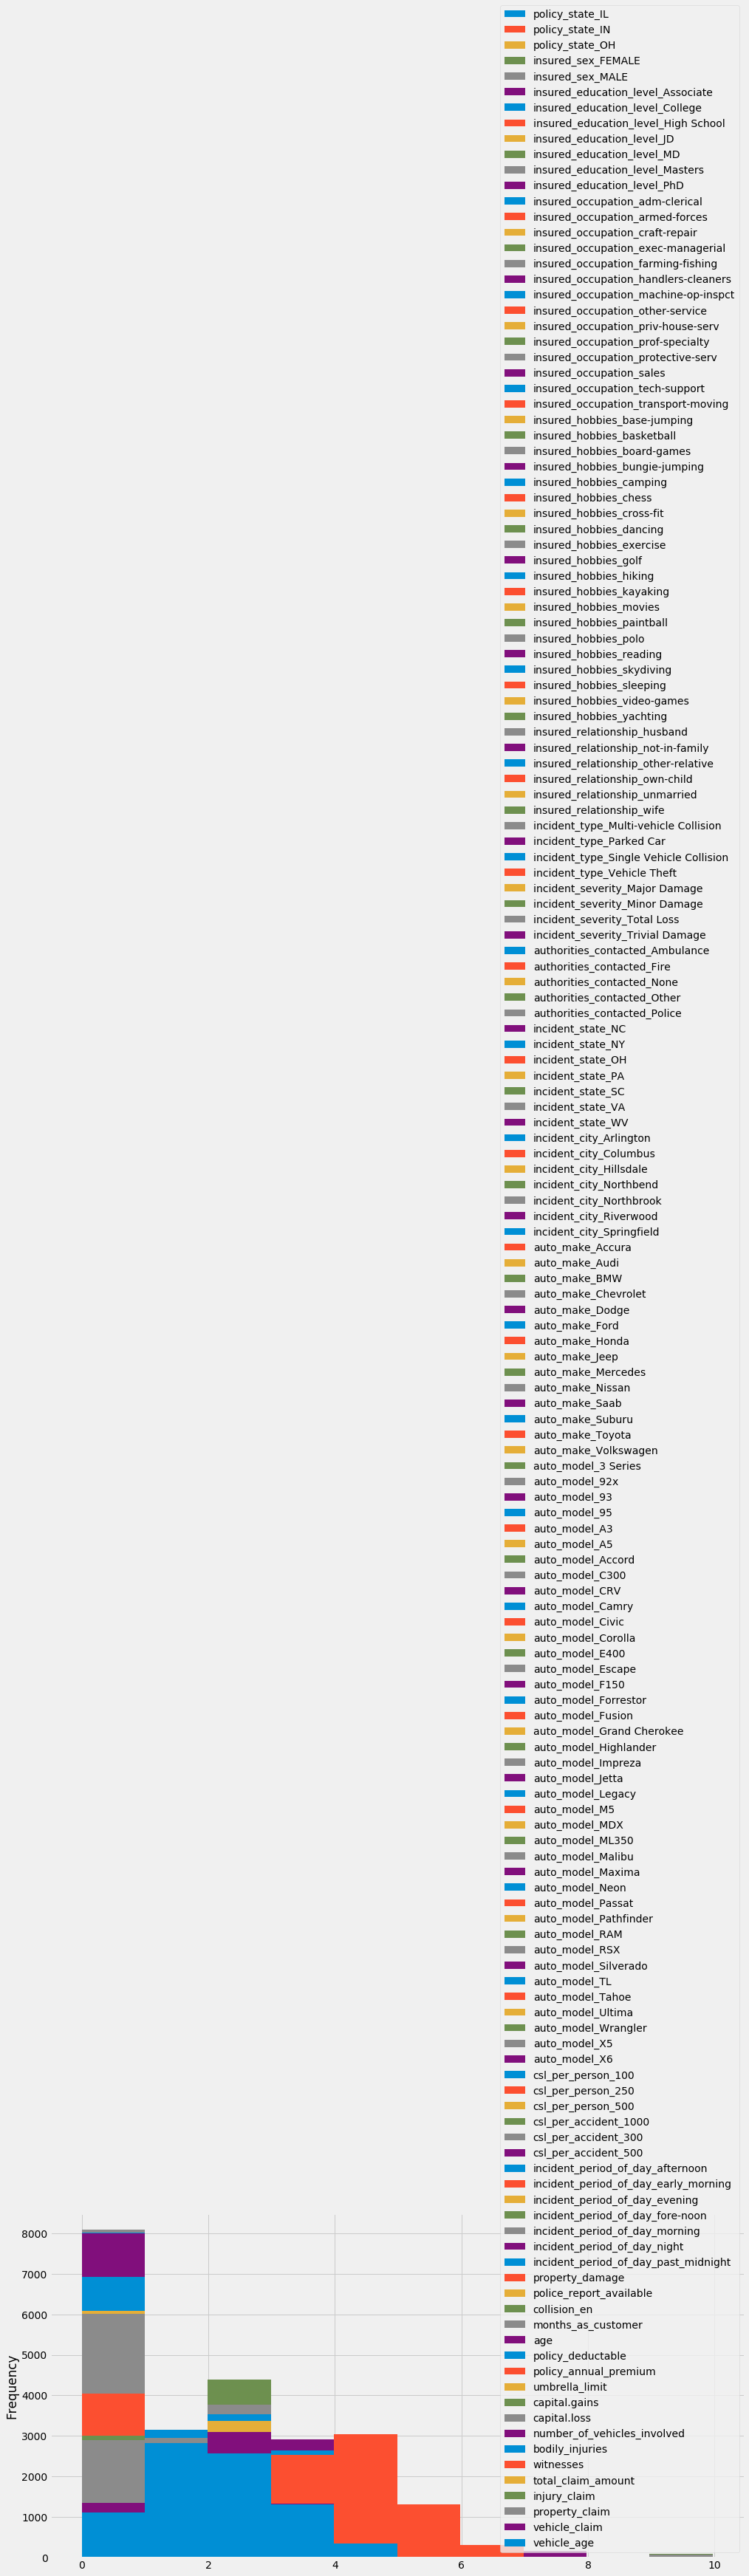

In [73]:
# Generate a Histogram plot on scaled data to check anomalies
plt.rcParams['figure.figsize'] = [15, 8]
X_train_scaled.plot(kind='hist')

In [74]:
x_train_scaled = pd.DataFrame.to_numpy(X_train_scaled) # converting to array for computational ease
x_train_scaled

array([[0.        , 0.        , 2.09909411, ..., 2.52213226, 3.58073673,
        2.32400293],
       [0.        , 2.13021908, 0.        , ..., 1.10683502, 2.79361616,
        1.39440176],
       [2.13684297, 0.        , 0.        , ..., 2.26810455, 3.01916235,
        2.63386999],
       ...,
       [0.        , 0.        , 2.09909411, ..., 2.09391412, 3.31955118,
        1.85920235],
       [0.        , 0.        , 2.09909411, ..., 2.1410907 , 2.267172  ,
        1.85920235],
       [2.13684297, 0.        , 0.        , ..., 0.        , 0.98975575,
        2.47893646]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.882346 (0.015079)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.895814 (0.015307)
KNN: 0.979431 (0.007119)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DT: 0.990328 (0.002707)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.998654 (0.001390)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.998409 (0.001900)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ADA: 0.862634 (0.015827)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.872308 (0.016027)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GNB: 0.731145 (0.015877)


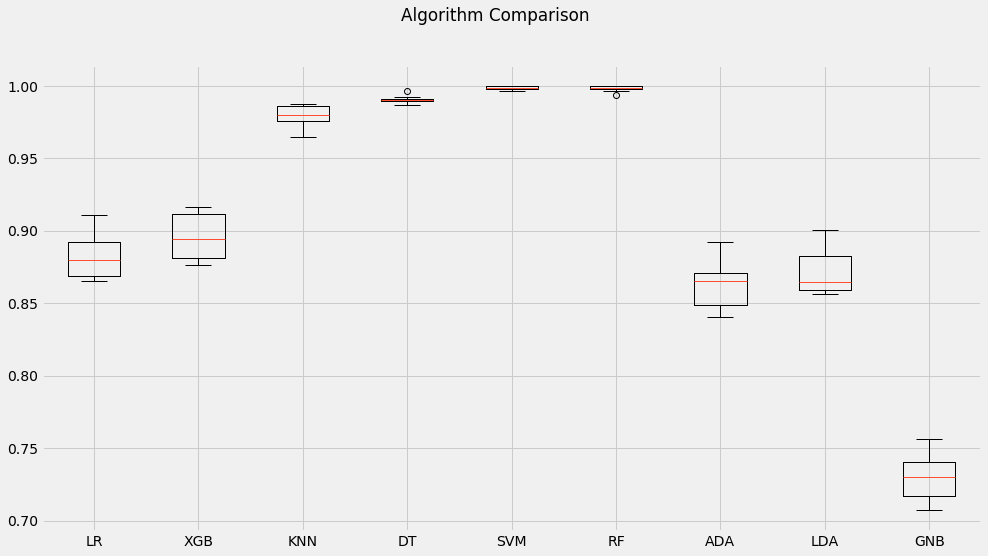

In [75]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]              
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [76]:
clf1= LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)
clf2 = XGBClassifier() 

clf = [
    ('LR', clf1), 
    ('XGB', clf2)] 
    
#create our voting classifier, inputting our models
eclf= VotingClassifier(estimators=[
    ('LR', clf1), 
    ('XGB', clf2)], voting='hard')

for clf, label in zip([clf1, clf2, eclf], [
    'Logistic Regression', 
    'XGB Classifier',
    'Ensemble']):
    
    scores = cross_val_score(clf, x_train_scaled, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.88 (+/- 0.01) [Logistic Regression]
Accuracy: 0.90 (+/- 0.02) [XGB Classifier]
Accuracy: 0.89 (+/- 0.02) [Ensemble]


In [77]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# fit model on all training data
xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)

# make predictions for test data and evaluate
xgb_pred = xgb.predict(X_test_scaled)
predictions = [round(value) for value in xgb_pred]
accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_scaled)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test_scaled)
    xgb_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in xgb_pred]
    accuracy = accuracy_score(y_test, xgb_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88.55%
Thresh=0.000, n=163, Accuracy: 88

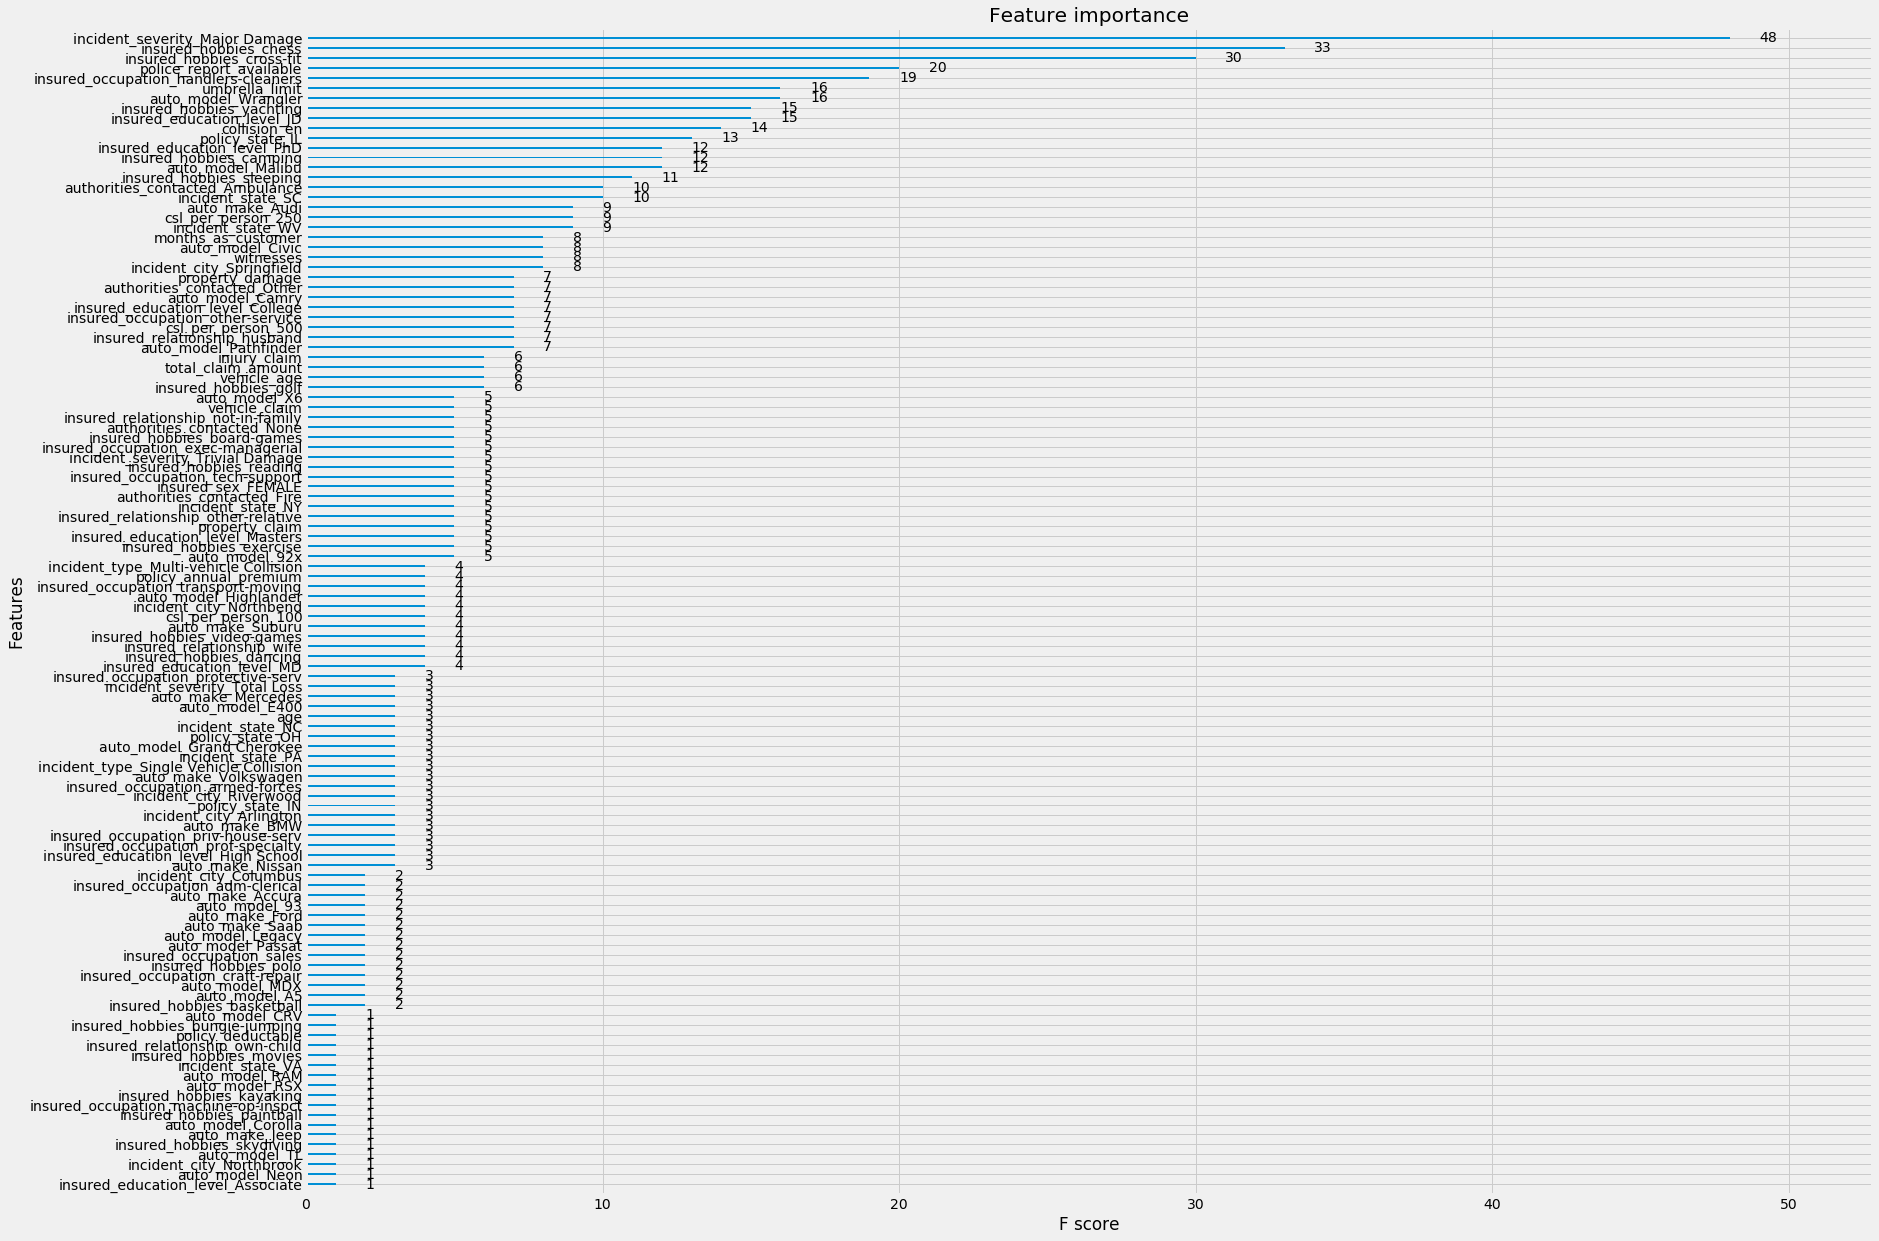

In [78]:
from xgboost import plot_importance
x = XGBClassifier()
x.fit(X_train_scaled, y_train) # fitting the model again on dataframe to identify the feature names

plt.rcParams['figure.figsize'] = [25, 20]
# plot feature importance
plot_importance(x)

In [79]:
from pprint import pprint
# Check parameters used 
print('Parameters currently in use:\n')
pprint(x.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best: -0.035376 using {'max_depth': 9}
-0.399755 (0.011874) with: {'max_depth': 1}
-0.256650 (0.011923) with: {'max_depth': 3}
-0.140782 (0.011174) with: {'max_depth': 5}
-0.066761 (0.007062) with: {'max_depth': 7}
-0.035376 (0.005156) with: {'max_depth': 9}


Text(0, 0.5, 'Log Loss')

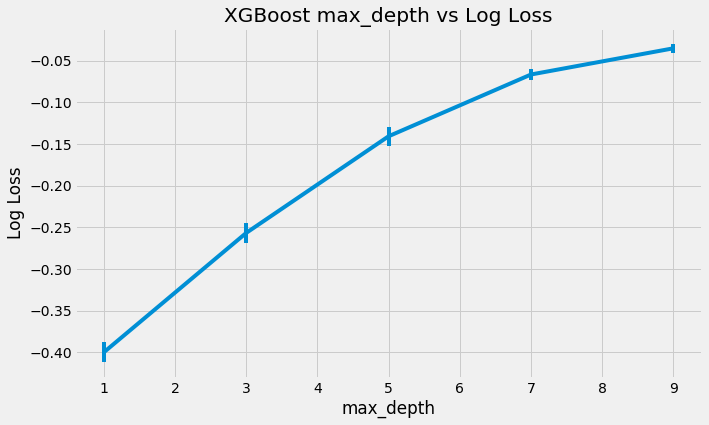

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = [10, 6]

# grid search
max_depth = range(1, 11, 2)
print(max_depth)

param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1,  iid=False)
grid_result = grid_search.fit(x_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 14.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best: -0.017716 using {'max_depth': 8, 'n_estimators': 200}
-0.371660 (0.011922) with: {'max_depth': 2, 'n_estimators': 50}
-0.333465 (0.012973) with: {'max_depth': 2, 'n_estimators': 100}
-0.305607 (0.012730) with: {'max_depth': 2, 'n_estimators': 150}
-0.284021 (0.013709) with: {'max_depth': 2, 'n_estimators': 200}
-0.266671 (0.013832) with: {'max_depth': 4, 'n_estimators': 50}
-0.195383 (0.013091) with: {'max_depth': 4, 'n_estimators': 100}
-0.150867 (0.011222) with: {'max_depth': 4, 'n_estimators': 150}
-0.120623 (0.010872) with: {'max_depth': 4, 'n_estimators': 200}
-0.172327 (0.010554) with: {'max_depth': 6, 'n_estimators': 50}
-0.095497 (0.008775) with: {'max_depth': 6, 'n_estimators': 100}
-0.059983 (0.006085) with: {'max_depth': 6, 'n_estimators': 150}
-0.040057 (0.004324) with: {'max_depth': 6, 'n_estimators': 200}
-0.108258 (0.007588) with: {'max_depth': 8, 'n_estimators': 50}
-0.046535 (0.003471) with: {'max_depth': 8, 'n_estimators': 100}
-0.026046 (0.002697) with: {'max_d

Text(0, 0.5, 'Log Loss')

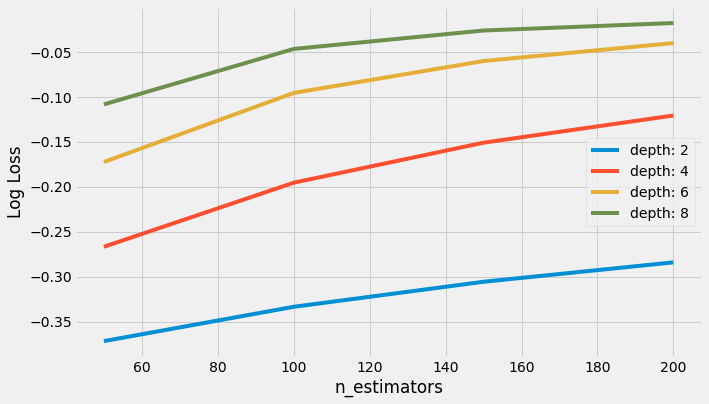

In [81]:
import numpy

n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1, iid=False)
grid_result = grid_search.fit(x_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

In [82]:
xgb = XGBClassifier(objective='binary:logistic', random_state=7, n_jobs=-1)
xgb.fit(x_train_scaled, y_train)
scores = cross_val_score(xgb, x_train_scaled, y_train, cv=kfold, scoring='brier_score_loss')
print('Brier loss:', "{0:.5f}".format(np.mean(scores)*-1))

Brier loss: 0.07136


In [83]:
print(xgb.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': -1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=9)],
    'max_depth': [i for i in range(3, 10)],
    'min_child_weight': [i for i in range(1, 7)],
    'subsample': [i/10.0 for i in range(6,11)],
    'colsample_bytree': [i/10.0 for i in range(6,11)]
}
 
# Create the randomised grid search model
# "n_iter = number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution"
rgs = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=200, cv=kfold, 
                         random_state=7, n_jobs=-1,
                         scoring='brier_score_loss', return_train_score=True)
# Fit rgs
rgs.fit(x_train_scaled, y_train)
 
# Print results
print(rgs)

In [82]:
best_score = rgs.best_score_
best_params = rgs.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.10631241913018777
Best params: 
colsample_bytree: 1.0
learning_rate: 0.01
max_depth: 3
min_child_weight: 3
n_estimators: 200
subsample: 1.0


In [83]:
# make predictions for test data and evaluate
rgs_pred = rgs.predict(X_test_scaled)

print('Accuracy: ', round(accuracy_score(y_test, rgs_pred)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, rgs_pred),3)))
print('Recall: ', round(recall_score(y_test, rgs_pred)*100, 2))
print('\n Classification Report:\n', classification_report(y_test, rgs_pred))

print(result.mean())

Accuracy:  82.0
Cohen Kappa: 0.58
Recall:  84.31

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       149
           1       0.61      0.84      0.70        51

    accuracy                           0.82       200
   macro avg       0.77      0.83      0.79       200
weighted avg       0.85      0.82      0.83       200

0.841


In [84]:
xgb = XGBClassifier()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('XGB', XGBClassifier()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.828750 (0.023083)


In [85]:
# Fit rgs
model.fit(x_train_scaled, y_train)

# make predictions for test data
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.50%


In [86]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, rgs_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.55


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.55')

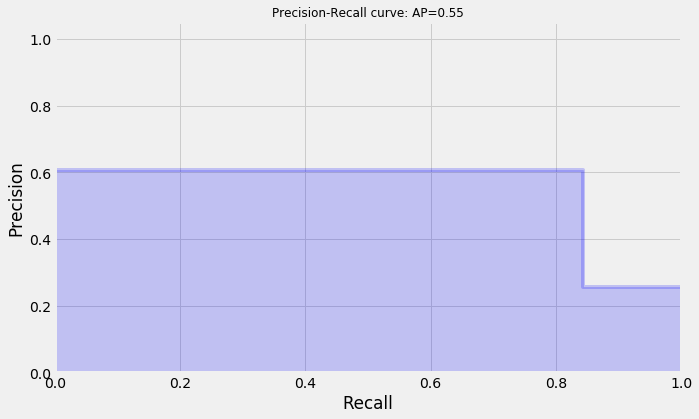

In [87]:
from sklearn.metrics import precision_recall_curve
from inspect import signature

plt.rcParams['figure.figsize'] = [10, 6]

precision, recall, _ = precision_recall_curve(y_test, rgs_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision), fontsize=12)

AUC: 0.828


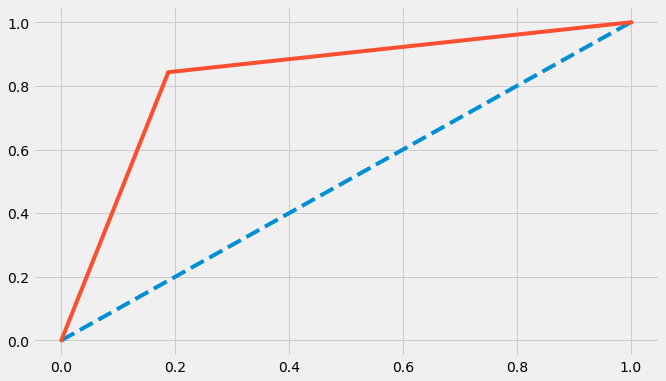

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_test, rgs_pred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, rgs_pred)

# plot no skill
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

Confusion matrix
[[121  28]
 [  8  43]]


<Figure size 720x432 with 0 Axes>

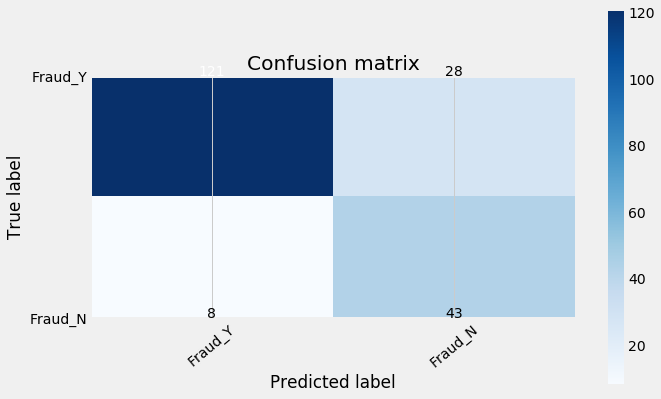

In [89]:
from sklearn.metrics import confusion_matrix
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    
    print('Confusion matrix')

    print(cm)
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(10,6))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rgs_pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud_Y','Fraud_N'],
                      title='Confusion matrix')

In [90]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.057) 
constant_filter.fit(X_train_scaled)  

constant_columns = [column for column in X_train_scaled.columns  
                    if column not in X_train_scaled.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [91]:
correlated_features = set()  
correlation_matrix = X_train_scaled.corr()  

for i in range(len(correlation_matrix .columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
len(correlated_features)

10

In [92]:
print(correlated_features)

{'auto_model_Wrangler', 'vehicle_claim', 'csl_per_accident_300', 'csl_per_accident_1000', 'property_claim', 'insured_sex_MALE', 'csl_per_accident_500', 'injury_claim', 'number_of_vehicles_involved', 'age'}


In [93]:
X.head(1)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,3,328,48

In [94]:
x = X.drop([ 
       'vehicle_claim', 
        'injury_claim', 
        'age', 
        'csl_per_accident_500', 
        'csl_per_accident_1000', 
        'auto_model_Wrangler', 
        'insured_sex_MALE', 
        'csl_per_accident_300', 
        'property_claim', 
        'number_of_vehicles_involved'], axis=1)

x.head(1)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,bodily_injuries,witnesses,total_claim_amount,vehicle_age
0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,3,328,1000,1406.91,0,53300,0,1,2,71610,14


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(x_train), len(x_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


In [96]:
a_train_scaled = scaler.fit_transform(x_train)
a_test_scaled = scaler.transform(x_test)

In [97]:
xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, a_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.822500 (0.037417)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.820000 (0.033166)
